In [74]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import os
from glob import glob

In [75]:
layers = ['layer1_3x64',
          'layer2_64x64',
          'layer3_64x128',
          'layer4_128x128',
          'layer5_128x256',
          'layer6_256x256',
          'layer7_256x256',
          'layer8_256x512',
          'layer9_512x512',
          'layer10_512x512',
          'layer11_512x512',
          'layer12_512x512',
          'layer13_512x512']

In [76]:
csvs = {}
csv_root = 'csv'
for layer in layers:
    csvs[layer] = pd.read_csv(os.path.join(csv_root,layer + '.csv'))

In [77]:
methods = csvs[layers[0]].columns.tolist()

In [78]:
avg = {x:{} for x in layers}
for layer in layers:
    for method in methods:
        avg[layer][method] = csvs[layer][method].mean()

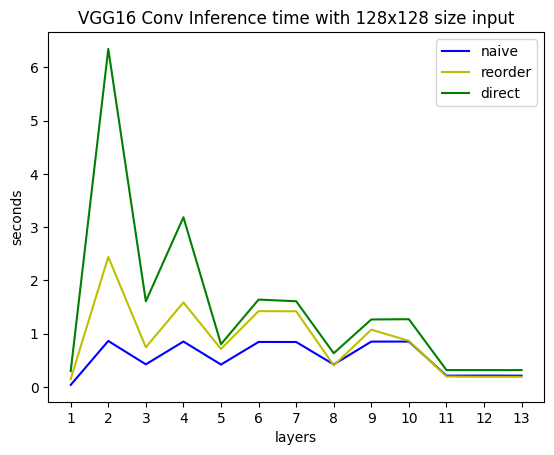

In [89]:
color = ['b','y','g']

for i, method in enumerate(methods):
    x = [x for x in range(1,14)]
    y = []
    for layer in layers:
        y.append(avg[layer][method])
    plt.plot(x,y,c = color[i],label=method)
    plt.xticks(x)
plt.title('VGG16 Conv Inference time with 128x128 size input')
plt.xlabel('layers')
plt.ylabel('seconds')
plt.legend()
plt.savefig("Performance.png")